# **Maestría en Inteligencia Artificial Aplicada**

## **Curso: Inteligencia Artificial y Aprendizaje Automático**

### Tecnológico de Monterrey

### Prof Luis Eduardo Falcón Morales

## **Actividad de las Semanas 5 y 6**
### **Problema de asignación de créditos: South German Dataset.**


## **Nombres y matrículas:**



*   Nombre y matrícula

*   Nombre y matrícula

*   Nombre y matrícula



## **Ejercicio 1**

In [25]:
# Aquí deberás incluir todas las librerías que requieras durante esta actividad:

# Librerías básicas
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import xgboost
import warnings

warnings.filterwarnings('ignore')

import sklearn
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, RepeatedStratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,make_scorer
from imblearn.metrics import geometric_mean_score

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE,ADASYN
from imblearn.under_sampling import RandomUnderSampler


In [26]:
# Verificando versiones de algunas de las principales librerías.
# Si algunas no se utilizan, puedes comentarlas.
tmp = !python -V
print(tmp[0])
print('Numpy', np.__version__)
print('Pandas', pd.__version__)
print('Matplotlib', matplotlib.__version__)
print('Seaborn', sns.__version__)
print('Scikit-Learn', sklearn.__version__)
print('XGBoost', xgboost.__version__)

# puedes incluir algunas otras ...


Python 3.12.9
Numpy 1.26.4
Pandas 2.2.2
Matplotlib 3.9.1.post1
Seaborn 0.13.2
Scikit-Learn 1.5.0
XGBoost 2.1.3


In [27]:
# Si deseas desplegar los Warnings:
#import warnings
#warnings.filterwarnings('ignore')

In [28]:
# Carga los datos del archivo SouthGermanCredit.asc:

# ************* Inlcuye aquí tu código:*****************************


df = pd.read_csv("SouthGermanCredit.asc",sep = ' ')


# *********** Aquí termina la sección de agregar código *************


print('Dimensión del DataFrame (registros,variables):', df.shape)
df.head(3).T

Dimensión del DataFrame (registros,variables): (1000, 21)


,0,1,2
laufkont,1,1,2
laufzeit,18,9,12
moral,4,4,2
verw,2,0,9
hoehe,1049,2799,841
sparkont,1,1,2
beszeit,2,3,4
rate,4,2,2
famges,2,3,2
buerge,1,1,1


In [29]:
# Renombra las columnas del alemán al inglés y desplegamos de
# nuevo el DataFrame para ver el resultado obtenido:

# ************* Inlcuye aquí tu código:*****************************


column_names = {
    'laufkont': 'status',
    'laufzeit': 'duration',
    'moral': 'credit_history',
    'verw': 'purpose',
    'hoehe': 'amount',
    'sparkont': 'savings',
    'beszeit': 'employment_duration',
    'rate': 'installment_rate',
    'famges': 'personal_status_sex',
    'buerge': 'other_debtors',
    'wohnzeit': 'present_residence',
    'verm': 'property',
    'alter': 'age',
    'weitkred': 'other_installment_plans',
    'wohn': 'housing',
    'bishkred': 'number_credits',
    'beruf': 'job',
    'pers': 'people_liable',
    'telef': 'telephone',
    'gastarb': 'foreign_worker',
    'kredit': 'credit_risk'  # Variable objetivo
}

df.rename(columns=column_names, inplace=True)


# *********** Aquí termina la sección de agregar código *************


df.head(3).T

,0,1,2
status,1,1,2
duration,18,9,12
credit_history,4,4,2
purpose,2,0,9
amount,1049,2799,841
savings,1,1,2
employment_duration,2,3,4
installment_rate,4,2,2
personal_status_sex,2,3,2
other_debtors,1,1,1


## **Ejercicio 2**

In [30]:
# De la documentación de los datos SouthGermandata se sabe que la clase mayoritaria
# de los buenos clientes se etiquetó con el valor de 1 en la variable de salida
# llamada "credit_risk".
# Veamos:

print(df['credit_risk'].value_counts())

credit_risk
1    700
0    300
Name: count, dtype: int64


In [31]:
# Por lo tanto, realiza a continuación una transformación para que la clase mayoritaria
# sea la clase negativa (es decir, de valor 0) y que la clase minoritaria sea la
# clase positiva (es decir, de valor 1).

# ************* Inlcuye aquí tu código:*****************************


print("Valores únicos antes de la transformación:", df['credit_risk'].unique())

df['credit_risk'] = df['credit_risk'].map({1: 0, 0: 1})

print("Valores únicos después de la transformación:", df['credit_risk'].unique())


# *********** Aquí termina la sección de agregar código *************


print(df['credit_risk'].value_counts())

Valores únicos antes de la transformación: [1 0]
Valores únicos después de la transformación: [0 1]
credit_risk
0    700
1    300
Name: count, dtype: int64


## **Ejercicio 3**

In [32]:
# Ejercicio 3a.
# Realiza una partición con el porcentaje solicitado para entrenamiento y prueba.
# Los nombres de los conjuntos deberán ser como se indican en los print de abajo:

# ************* Inlcuye aquí tu código:*****************************


Xtrain, Xtest, ytrain, ytest = train_test_split(df.drop(columns=['credit_risk']), df['credit_risk'], test_size=0.3, random_state=1, stratify=df['credit_risk'])
ytrain = ytrain.to_frame()
ytest = ytest.to_frame()

# *********** Aquí termina la sección de agregar código *************


# Mostremos las dimensiones de la partición generada:
print("Dimensiones:")
print("Entrenamiento:", Xtrain.shape, ytrain.shape)
print("Prueba:", Xtest.shape, ytest.shape)

# Y el porcentaje de cada clase de la variable de salida:
tmp = (ytrain.sum()/ytrain.shape[0]).iloc[0]
print("\nPorcentaje clases Negativa:%.2f%%, y Positiva:%.2f%%" % (100*(1-tmp),tmp*100))


Dimensiones:
Entrenamiento: (700, 20) (700, 1)
Prueba: (300, 20) (300, 1)

Porcentaje clases Negativa:70.00%, y Positiva:30.00%


### **Ejercicio 3b**
### **Con base al porcentaje de los niveles de la variable de salida ¿podemos decir que tenemos un problema de datos desbalanceado? ¿Por qué?**



### ++++++++ Inicia la sección de agregar texto: +++++++++++

Con base en la información obtenida, podemos indicar que existe un desbalance en los datos, dado que el 70% de los clientes pertenece a la clase “0” (clientes sin problemas de crédito), mientras que solo el 30% pertenece a la clase “1” (clientes con problemas de pago). Este desbalance refleja que los incumplimientos de crédito son un evento poco frecuente en la organización.

### ++++++++ Termina la sección de agregar texto: +++++++++++



### **Ejercicio 3c**
### **¿Por qué se hizo el cambio de etiquetas 0 y 1 en la variable de salida?**



### ++++++++ Inicia la sección de agregar texto: +++++++++++

Se realiza el cambio debido a que la clase de interés normalemnte es la de valor 1, que en nuetro caso una vez realizado el cambio representa a los clientes sin problemas de crédito.

### ++++++++ Termina la sección de agregar texto: +++++++++++


## **Ejercicio 4**

In [33]:
# De acuerdo a la información de la Tabla 3 del artículo de la IEEE asociado a
# esta Actividad, define a continuación las variables de entrada correspondientes
# de acuerdo a su tipo y como se indica a continuación:

# ************* Inlcuye aquí tu código:*****************************

# Variables numéricas:
lista_paper_num = ['duration', 'amount', 'age', 'people_liable']


# Variables ordinales:
lista_paper_ord = ['employment_duration', 'installment_rate', 'present_residence', 'property', 'number_credits', 'job']


# Variables nominales & binarias:
lista_paper_cat = ['status', 'credit_history', 'purpose', 'savings', 'personal_status_sex', 'other_debtors', 'other_installment_plans', 'housing', 'telephone', 'foreign_worker']




# *********** Aquí termina la sección de agregar código *************

print("Para los datos de entrada, veamos la cantidad de cada tipo de variable obtenida:")
print("Variables numéricas:", len(lista_paper_num))
print("Variables ordinales:", len(lista_paper_ord))
print("Variables nominales & binarias:", len(lista_paper_cat))


Para los datos de entrada, veamos la cantidad de cada tipo de variable obtenida:
Variables numéricas: 4
Variables ordinales: 6
Variables nominales & binarias: 10


## **Ejercicio 5**

In [34]:
# En esta sección puedes incluir todas las celdas que consideres necesarias para
# visualizar o bien obtener información de cada tipo de variable y te ayude a
# determinar qué transformaciones aplicarás a cada una en el módulo de Pipeline.

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   status                   1000 non-null   int64
 1   duration                 1000 non-null   int64
 2   credit_history           1000 non-null   int64
 3   purpose                  1000 non-null   int64
 4   amount                   1000 non-null   int64
 5   savings                  1000 non-null   int64
 6   employment_duration      1000 non-null   int64
 7   installment_rate         1000 non-null   int64
 8   personal_status_sex      1000 non-null   int64
 9   other_debtors            1000 non-null   int64
 10  present_residence        1000 non-null   int64
 11  property                 1000 non-null   int64
 12  age                      1000 non-null   int64
 13  other_installment_plans  1000 non-null   int64
 14  housing                  1000 non-null   int64
 15  numbe

In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
status,1000.0,2.577,1.257638,1.0,1.0,2.0,4.00,4.0
duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
credit_history,1000.0,2.545,1.083120,0.0,2.0,2.0,4.00,4.0
purpose,1000.0,2.828,2.744439,0.0,1.0,2.0,3.00,10.0
amount,1000.0,3271.248,2822.751760,250.0,1365.5,2319.5,3972.25,18424.0
savings,1000.0,2.105,1.580023,1.0,1.0,1.0,3.00,5.0
employment_duration,1000.0,3.384,1.208306,1.0,3.0,3.0,5.00,5.0
installment_rate,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
personal_status_sex,1000.0,2.682,0.708080,1.0,2.0,3.0,3.00,4.0
other_debtors,1000.0,1.145,0.477706,1.0,1.0,1.0,1.00,3.0


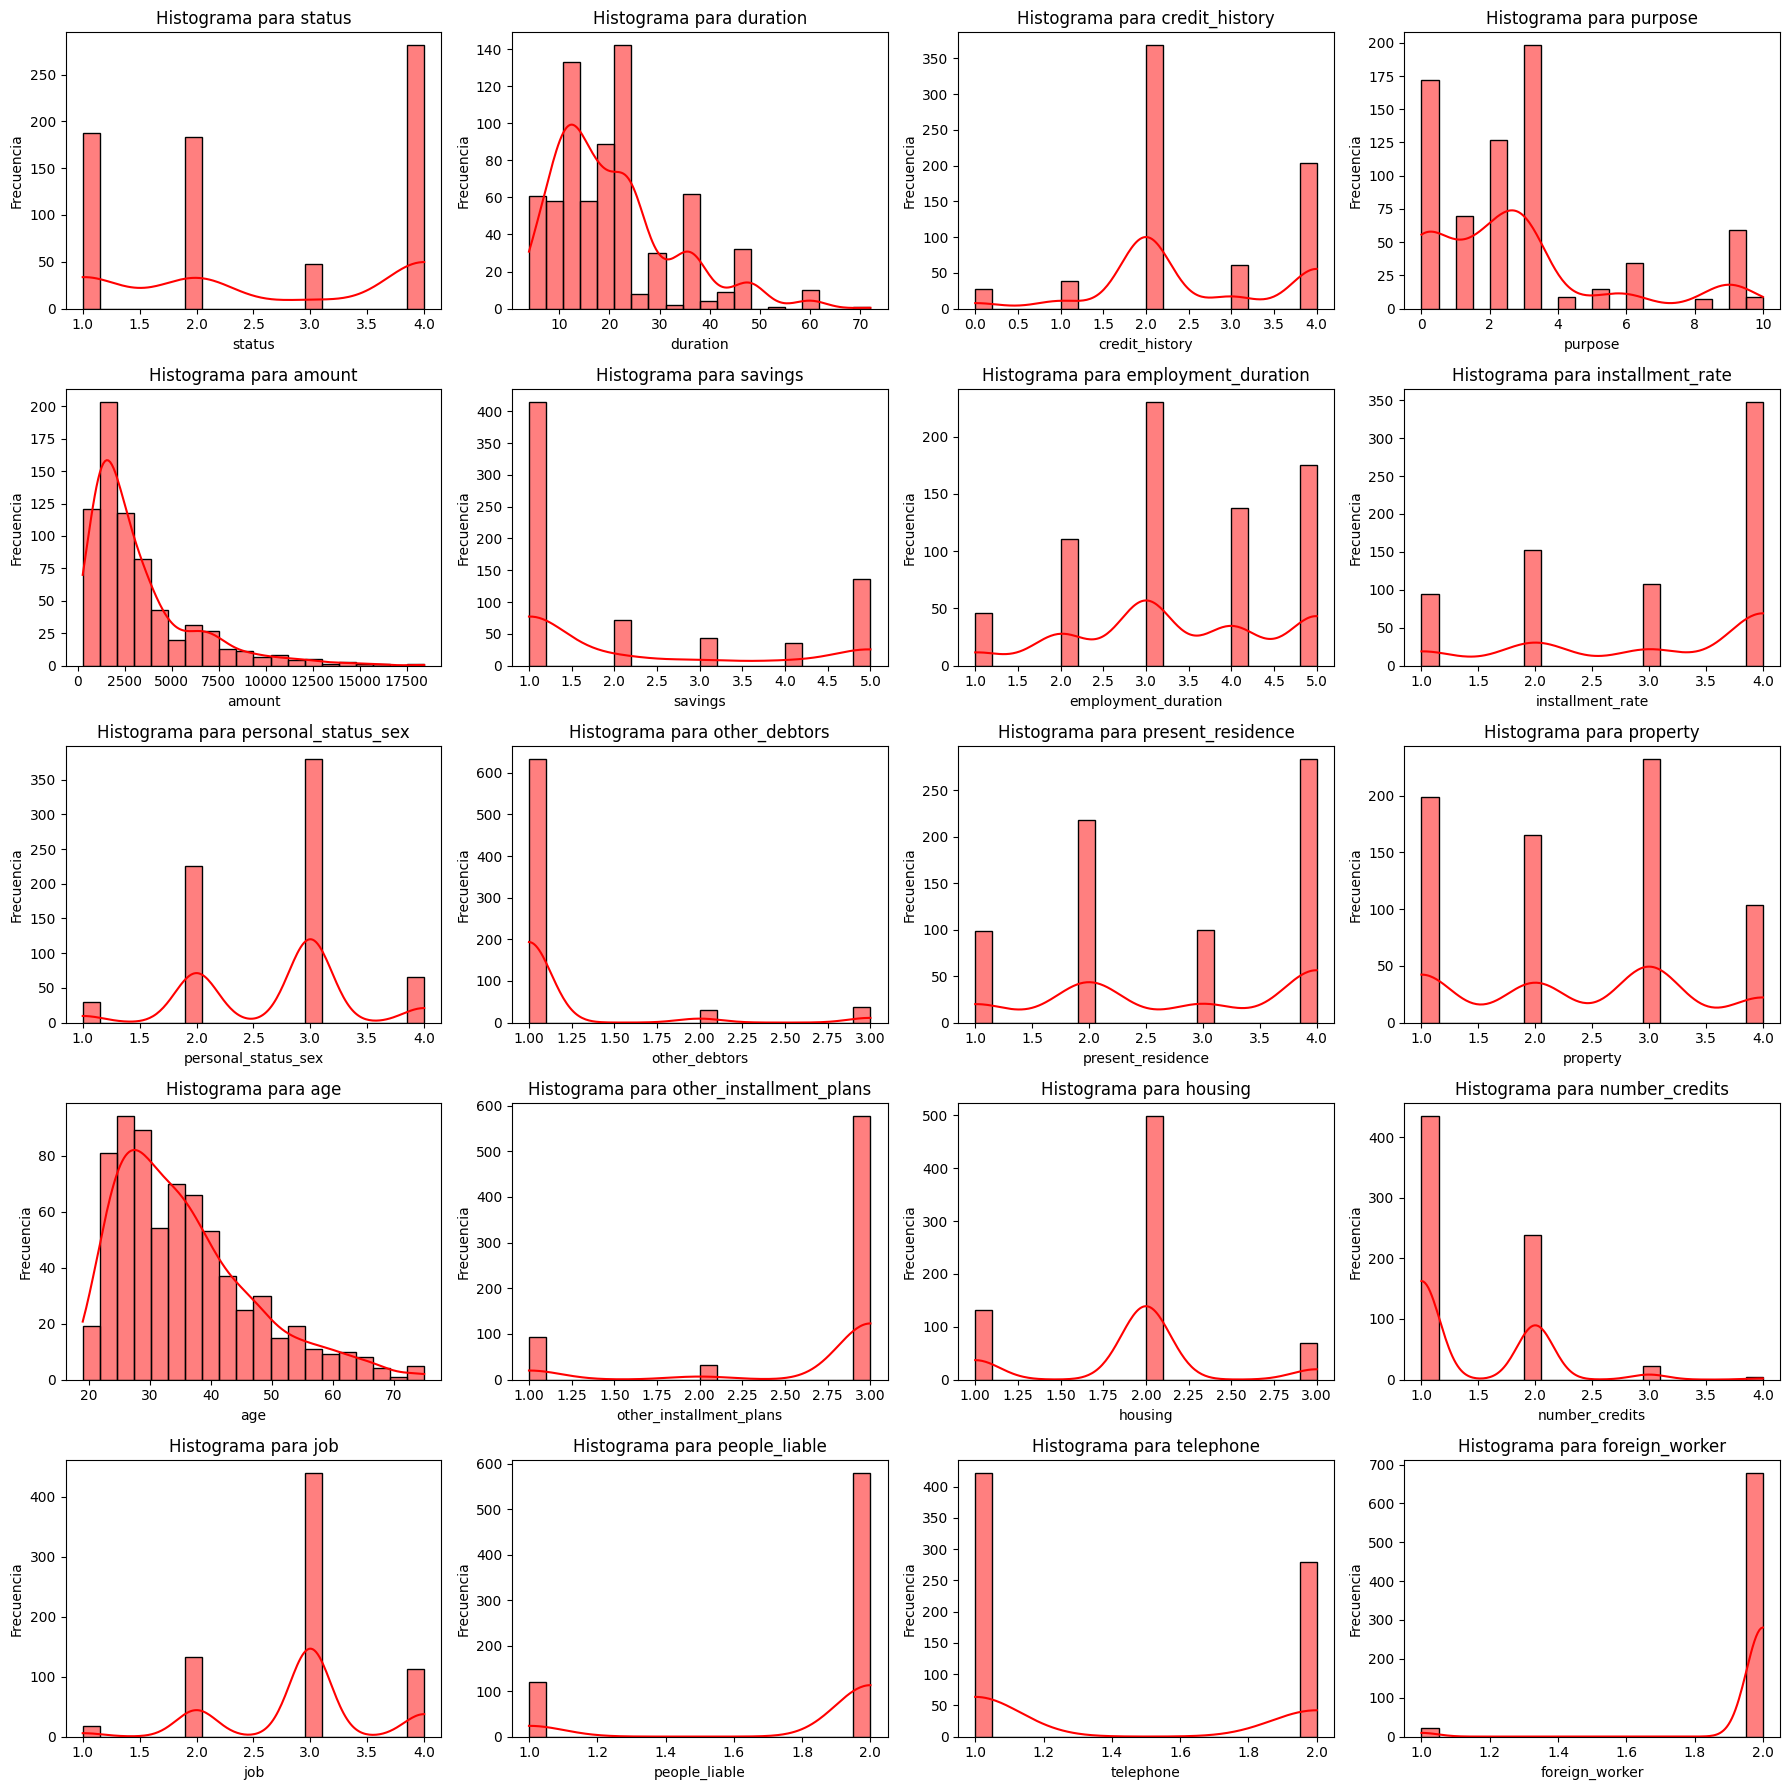

In [36]:
dfnum = Xtrain.select_dtypes(include=['float64', 'int64'])

fig, axes = plt.subplots(5,4, figsize=(18, 18))
axes = axes.flatten()
for i, columna in enumerate(dfnum.columns):
    sns.histplot(dfnum[columna], bins=20, color = 'red', ax=axes[i], kde=True)
    axes[i].set_title(f'Histograma para {columna}')
    axes[i].set_xlabel(columna)
    axes[i].set_ylabel('Frecuencia')
plt.tight_layout()
plt.show()



In [37]:
# Una vez analizados los datos de entrada, las transformaciones que se aplicarán
# a cada tipo de variable usando la clase Pipeline de sklearn son las siguientes:


# ************* Inlcuye aquí tu código:*****************************

# Variables numéricas:
numericas_pipe = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                                 ('scaler', StandardScaler())])
numericas_pipe_nombres = ['duration', 'amount', 'age', 'people_liable']




# Variables categóricas-Nominales:
nominales_pipe = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),   
                                 ('ordinal_encoder', OrdinalEncoder())])
nominales_pipe_nombres = ['employment_duration', 'installment_rate', 'present_residence', 'property', 'number_credits', 'job']




# Variables categóricas-ordinales:
ordinales_pipe = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                                 ('onehot', OneHotEncoder(drop='first'))])
ordinales_pipe_nombres = ['status', 'credit_history', 'purpose', 'savings', 'personal_status_sex','other_debtors', 'other_installment_plans', 'housing', 'telephone', 'foreign_worker']




# Conjuntas las transformaciones de todo tipo de variable y
# deja sin procesar aquellas que hayas decidido no transformar:

columnasTransformer = ColumnTransformer(transformers=[
                                                        ('num', numericas_pipe, numericas_pipe_nombres), 
                                                        ('ord', ordinales_pipe, ordinales_pipe_nombres), 
                                                        ('cat', nominales_pipe, nominales_pipe_nombres)  
                                                     ])




# *********** Aquí termina la sección de agregar código *************



Xtmp = Xtrain.copy()
tmp = columnasTransformer.fit_transform(Xtmp)
print("Dimensión de los datos de entrada:")
print("antes de aplicar las transformaciones:", Xtmp.shape)
print("después de aplicar las transformaciones:", tmp.shape)


Dimensión de los datos de entrada:
antes de aplicar las transformaciones: (700, 20)
después de aplicar las transformaciones: (700, 41)


## **Ejercicio 6**

In [38]:
# Como se va a utilizar Validación-Cruzada, concatena los conjuntos de entrenamiento
# y prueba en uno nuevo conjunto aumentado que llamaremos trainval:


# ************* Inlcuye aquí tu código:**************************


Xtraintest = pd.concat([Xtrain,Xtest])
ytraintest = pd.concat([ytrain,ytest])


# *********** Aquí termina la sección de agregar código *************


# Veamos cuántas variables nuevas se introducen con las transformaciones One-Hot-Encoding:
Xtmp = Xtraintest.copy()
tmp = columnasTransformer.fit_transform(Xtmp)
print("Dimensión de las variables de entrada ANTES de las transformaciones:", Xtmp.shape)
print("Dimensión de las variables de entrada DESPUÉS de las transformaciones:", tmp.shape)

Dimensión de las variables de entrada ANTES de las transformaciones: (1000, 20)
Dimensión de las variables de entrada DESPUÉS de las transformaciones: (1000, 41)


## **Ejercicio 7**

In [39]:
# Definimos una función que evaluará cada modelo con diferentes tipos de métricas,
# así como incluyendo algún método de submuestreo o sobremuestreo.

def mi_fun(modelo, nombre, Xtraintest, ytraintest, metodo_uo=None):
        """
        Se lleva a cabo el proceso de entrenamiento y evaluación
        con diferentes métricas.
        Args:
             modelo: modelo con la configuración deseada
             nombre: nombre del modelo
             Xtriantest, ytraintest: Variables de entrada y variable de salida
             mod_uo: método de submuestreo o sobremuestreo, si aplica.
        """

        pipeline = ImbPipeline(steps=[
            ('sub_sobre_muestreo', metodo_uo),
            ('model', modelo)
        ])

        micv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=5)
        mismetricas = {
            'miaccuracy': 'accuracy',
            'miprecision': 'precision',
            'mirecall': 'recall',
            'mifi': 'f1',
            'miauc': 'roc_auc',
            'migmean': make_scorer(geometric_mean_score)
        }

        scores = cross_validate(pipeline, Xtraintest, np.ravel(ytraintest), scoring=mismetricas, cv=micv, return_train_score=True)

        print('>> %s' % nombre)
        for j, k in enumerate(list(scores.keys())):
            if j > 1:
                print('\t %s %.4f (%.3f)' % (k, np.nanmean(scores[k]), np.nanstd(scores[k])))



### **Ejercicio 7a: Regresión Logística**

In [40]:
# Regresión Logística - Logistic Regression-LR:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

# Puedes consultar la siguiente liga para los métodos de submuestreo o sobremuestreo:
# https://imbalanced-learn.org/stable/references/over_sampling.html

# ************* Inlcuye aquí tu código:**************************

nombre = "Regresión_Logística"

# Selecciona la configuración de valores de hiperparámetros que consideres
# te da el mejor desempeño:
modelo = LogisticRegression(
            solver= 'liblinear',
            max_iter=500,
            penalty = 'l1',
            C= 100, 
            random_state=1
            )



# Selecciona el método de submuestreo o sobremuestreo, si lo deseas incluir.
metodo_uo= SMOTE(sampling_strategy=0.5, random_state=1)


# *********** Aquí termina la sección de agregar código *************


# Evaluemos la configuración seleccionada:
mi_fun(modelo,nombre, Xtraintest, ytraintest, metodo_uo)


>> Regresión_Logística
	 test_miaccuracy 0.7590 (0.024)
	 train_miaccuracy 0.7768 (0.005)
	 test_miprecision 0.6202 (0.050)
	 train_miprecision 0.6567 (0.011)
	 test_mirecall 0.5089 (0.064)
	 train_mirecall 0.5364 (0.016)
	 test_mifi 0.5575 (0.053)
	 train_mifi 0.5903 (0.012)
	 test_miauc 0.7798 (0.028)
	 train_miauc 0.8058 (0.007)
	 test_migmean 0.6625 (0.043)
	 train_migmean 0.6869 (0.010)


### **Ejercicio 7b: k-Vecinos Más Cercanos (kNN)**

In [41]:
# k-Vecinos más Cercanos : k-Nearest-Neighbors-kNN:
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html


# ************* Inlcuye aquí tu código:**************************

nombre ="k-Vecinos"
modelo = KNeighborsClassifier(
            n_neighbors=15,
            weights='uniform',
            metric='euclidean',
            p=1
            )
metodo_uo = None
# *********** Aquí termina la sección de agregar código *************


# Evaluemos la configuración seleccionada:
mi_fun(modelo, nombre, Xtraintest, ytraintest, metodo_uo)


>> k-Vecinos
	 test_miaccuracy 0.6907 (0.024)
	 train_miaccuracy 0.7218 (0.008)
	 test_miprecision 0.4676 (0.156)
	 train_miprecision 0.6323 (0.039)
	 test_mirecall 0.1256 (0.044)
	 train_mirecall 0.1731 (0.034)
	 test_mifi 0.1941 (0.060)
	 train_mifi 0.2701 (0.044)
	 test_miauc 0.5640 (0.044)
	 train_miauc 0.6913 (0.011)
	 test_migmean 0.3362 (0.062)
	 train_migmean 0.4047 (0.040)


### **Ejercicio 7c: Arbol de decisiones**

In [42]:
# Árbol de decisiones-DecisionTree-DT:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


# ************* Inlcuye aquí tu código:**************************

nombre = "Árbol de Decisión"
modelo =  DecisionTreeClassifier(
            criterion='gini',
            max_depth=5,
            min_samples_split=2,
            min_samples_leaf=20,
            random_state=1
            )
metodo_uo = None

# *********** Aquí termina la sección de agregar código *************


# Evaluemos la configuración seleccionada:
mi_fun(modelo, nombre, Xtraintest, ytraintest, metodo_uo)


>> Árbol de Decisión
	 test_miaccuracy 0.7260 (0.021)
	 train_miaccuracy 0.7686 (0.009)
	 test_miprecision 0.5559 (0.047)
	 train_miprecision 0.6565 (0.036)
	 test_mirecall 0.4144 (0.102)
	 train_mirecall 0.4933 (0.079)
	 test_mifi 0.4698 (0.076)
	 train_mifi 0.5578 (0.044)
	 test_miauc 0.7199 (0.043)
	 train_miauc 0.8136 (0.012)
	 test_migmean 0.5915 (0.066)
	 train_migmean 0.6582 (0.042)


### **Ejercicio 7d: Bosque Aleatorio - Random Forest**

In [43]:
# Bosque Aleatorio-RandomForest-RF:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html


# ************* Inlcuye aquí tu código:**************************

nombre = "Random Forest"
modelo = RandomForestClassifier(
    bootstrap=True,
    criterion='entropy',
    max_depth=15,
    max_features='sqrt',
    min_samples_leaf=20,
    min_samples_split=10,
    n_estimators=100,
    random_state=1,
    n_jobs=-1
    )
metodo_uo =SMOTE(sampling_strategy=0.5, random_state=1)

# *********** Aquí termina la sección de agregar código *************


# Evaluemos la configuración seleccionada:
mi_fun(modelo, nombre, Xtraintest, ytraintest, metodo_uo)


>> Random Forest
	 test_miaccuracy 0.7443 (0.021)
	 train_miaccuracy 0.7973 (0.009)
	 test_miprecision 0.6456 (0.063)
	 train_miprecision 0.7921 (0.019)
	 test_mirecall 0.3244 (0.069)
	 train_mirecall 0.4403 (0.032)
	 test_mifi 0.4288 (0.072)
	 train_mifi 0.5652 (0.028)
	 test_miauc 0.7817 (0.031)
	 train_miauc 0.8608 (0.004)
	 test_migmean 0.5441 (0.059)
	 train_migmean 0.6464 (0.023)


### **Ejercicio 7e: XGBoosting**

In [44]:
# XGBoosting:
# https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBClassifier
# https://xgboost.readthedocs.io/en/stable/parameter.html


# ************* Inlcuye aquí tu código:**************************

nombre = "XGBoosting"
modelo = XGBClassifier(
    learning_rate=0.09,
    max_depth=6,
    n_estimators=100,
    subsample=0.05,
    objective='binary:logistic',
    random_state=1,
    n_jobs=-1
    )
metodo_uo =SMOTE(sampling_strategy=0.5, random_state=1)

# *********** Aquí termina la sección de agregar código *************


# Evaluemos la configuración seleccionada:
mi_fun(modelo, nombre, Xtraintest, ytraintest, metodo_uo)


>> XGBoosting
	 test_miaccuracy 0.7527 (0.026)
	 train_miaccuracy 0.7904 (0.009)
	 test_miprecision 0.6077 (0.049)
	 train_miprecision 0.6863 (0.020)
	 test_mirecall 0.4889 (0.085)
	 train_mirecall 0.5569 (0.037)
	 test_mifi 0.5392 (0.069)
	 train_mifi 0.6140 (0.023)
	 test_miauc 0.7763 (0.035)
	 train_miauc 0.8284 (0.007)
	 test_migmean 0.6477 (0.057)
	 train_migmean 0.7037 (0.021)


### **Ejercicio 7f: Red Neuronal Multicapa (MLP)**

In [45]:
# Red neuronal de Perceptrón Multicapa-MLP:
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html


# ************* Inlcuye aquí tu código:**************************

nombre = "MLP"
modelo = MLPClassifier(
    activation='logistic',
    alpha=0.0001,
    hidden_layer_sizes=(100,),
    learning_rate='constant',
    max_iter=500,
    solver='adam',
    random_state=1
    )
metodo_uo = None

# *********** Aquí termina la sección de agregar código *************


# Evaluemos la configuración seleccionada:
mi_fun(modelo, nombre, Xtraintest, ytraintest, metodo_uo)


>> MLP
	 test_miaccuracy 0.7217 (0.019)
	 train_miaccuracy 0.7240 (0.020)
	 test_miprecision 0.5200 (0.383)
	 train_miprecision 0.5288 (0.379)
	 test_mirecall 0.1133 (0.101)
	 train_mirecall 0.1189 (0.120)
	 test_mifi 0.1783 (0.145)
	 train_mifi 0.1826 (0.158)
	 test_miauc 0.7321 (0.041)
	 train_miauc 0.7550 (0.032)
	 test_migmean 0.2640 (0.199)
	 train_migmean 0.2670 (0.207)


### **Ejercicio 7g: Máquina de Vector Soporte (SVM)**

In [46]:
# Máquina de Vectores de Soporte-SVM:
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html


# ************* Inlcuye aquí tu código:**************************

nombre = "SMV"
modelo = SVC(
        kernel="rbf",
        C=0.5,gamma="scale",
        random_state=1
        )
metodo_uo = None 

# *********** Aquí termina la sección de agregar código *************


# Evaluemos la configuración seleccionada:
mi_fun(modelo, nombre, Xtraintest, ytraintest, metodo_uo)


>> SMV
	 test_miaccuracy 0.7100 (0.011)
	 train_miaccuracy 0.7111 (0.003)
	 test_miprecision 0.6856 (0.233)
	 train_miprecision 0.6894 (0.059)
	 test_mirecall 0.0667 (0.024)
	 train_mirecall 0.0672 (0.009)
	 test_mifi 0.1205 (0.042)
	 train_mifi 0.1224 (0.016)
	 test_miauc 0.5578 (0.044)
	 train_miauc 0.5658 (0.018)
	 test_migmean 0.2513 (0.051)
	 train_migmean 0.2569 (0.018)


## **Ejercicio 8**

In [47]:
# Incluye el reporte del mejor modelo solicitado en el archivo PDF:

mejor_modelo = RandomForestClassifier(bootstrap=True,
    criterion='entropy',
    max_depth=15,
    max_features='sqrt',
    min_samples_leaf=20,
    min_samples_split=10,
    n_estimators=100,
    random_state=1,
    n_jobs=-1)
metodo_uo =SMOTE(sampling_strategy=0.5, random_state=1)
mi_fun(mejor_modelo, "Random Forest", Xtraintest, ytraintest, metodo_uo)

>> Random Forest
	 test_miaccuracy 0.7443 (0.021)
	 train_miaccuracy 0.7973 (0.009)
	 test_miprecision 0.6456 (0.063)
	 train_miprecision 0.7921 (0.019)
	 test_mirecall 0.3244 (0.069)
	 train_mirecall 0.4403 (0.032)
	 test_mifi 0.4288 (0.072)
	 train_mifi 0.5652 (0.028)
	 test_miauc 0.7817 (0.031)
	 train_miauc 0.8608 (0.004)
	 test_migmean 0.5441 (0.059)
	 train_migmean 0.6464 (0.023)


## **Ejercicio 9**

### **Escribe tus conclusiones finales de la actividad.**

### ++++++++ Inicia la sección de agregar texto: +++++++++++

En este estudio, evaluamos diversos modelos de machine learning para la predicción del riesgo de crédito, considerando el desafío del desbalanceo de clases en los datos. Probamos múltiples algoritmos, incluyendo Regresión Logística, k-Vecinos, Árbol de Decisión, Random Forest, XGBoost, MLP y SVM, aplicando diferentes técnicas de submuestreo y sobremuestreo para mejorar su desempeño.El problema de predicción de riesgo de crédito es complejo y requiere un enfoque equilibrado entre precisión y recall. Si bien Random Forest con SMOTE resultó ser el modelo más efectivo en este estudio, aún existe espacio para mejorar en la detección de clientes con problemas de crédito. Con ajustes adicionales y estrategias más avanzadas, podríamos seguir optimizando el modelo para obtener un sistema de predicción más robusto y confiable.


### ++++++++ Termina la sección de agregar texto. +++++++++++


>> ### **Fin de la Actividad de las Semanas 5 y 6.**